In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report

In [2]:
nba = pd.read_csv('nba_players.csv')
nba

,Unnamed: 0,Unnamed: 0.1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
0,0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,11140,11140,Maxi Kleber,DAL,28.0,208.28,108.862080,None,Germany,Undrafted,...,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20,0
11141,11141,11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,...,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20,0
11142,11142,11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,...,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20,0
11143,11143,11143,Norvel Pelle,PHI,27.0,208.28,104.779752,None,USA,Undrafted,...,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20,0


## __Data Cleaning & Preprocessing__


In [3]:
nba.describe()

,Unnamed: 0,Unnamed: 0.1,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,5572.000000,5572.000000,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078,0.040825
std,3217.428709,3217.428709,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017,0.197895
min,0.000000,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2786.000000,2786.000000,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000,0.000000
50%,5572.000000,5572.000000,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000,0.000000
75%,8358.000000,8358.000000,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000,0.000000
max,11144.000000,11144.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000,1.000000


In [4]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11145 non-null  int64  
 1   Unnamed: 0.1       11145 non-null  int64  
 2   player_name        11145 non-null  object 
 3   team_abbreviation  11145 non-null  object 
 4   age                11145 non-null  float64
 5   player_height      11145 non-null  float64
 6   player_weight      11145 non-null  float64
 7   college            11145 non-null  object 
 8   country            11145 non-null  object 
 9   draft_year         11145 non-null  object 
 10  draft_round        11145 non-null  object 
 11  draft_number       11145 non-null  object 
 12  gp                 11145 non-null  int64  
 13  pts                11145 non-null  float64
 14  reb                11145 non-null  float64
 15  ast                11145 non-null  float64
 16  net_rating         111

In [5]:
nba.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
potential_player     0
dtype: int64

We can drop columns are not necessary for our analysis and have missing data (Undrafted)

In [6]:
nba.drop(['Unnamed: 0', 'Unnamed: 0.1', 'team_abbreviation', 'draft_year', 'draft_round', 'draft_number', 'season' ], axis=1, inplace=True) 

In [7]:
nba

,player_name,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
0,Dennis Rodman,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,0
1,Dwayne Schintzius,28.0,215.90,117.933920,Florida,USA,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,0
2,Earl Cureton,39.0,205.74,95.254320,Detroit Mercy,USA,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,0
3,Ed O'Bannon,24.0,203.20,100.697424,UCLA,USA,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,0
4,Ed Pinckney,34.0,205.74,108.862080,Villanova,USA,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,Maxi Kleber,28.0,208.28,108.862080,None,Germany,63,9.1,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,0
11141,Melvin Frazier Jr.,23.0,195.58,97.522280,Tulane,USA,15,1.2,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,0
11142,Meyers Leonard,28.0,213.36,117.933920,Illinois,USA,49,6.1,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,0
11143,Norvel Pelle,27.0,208.28,104.779752,None,USA,20,2.1,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,0


#### Find Outliers

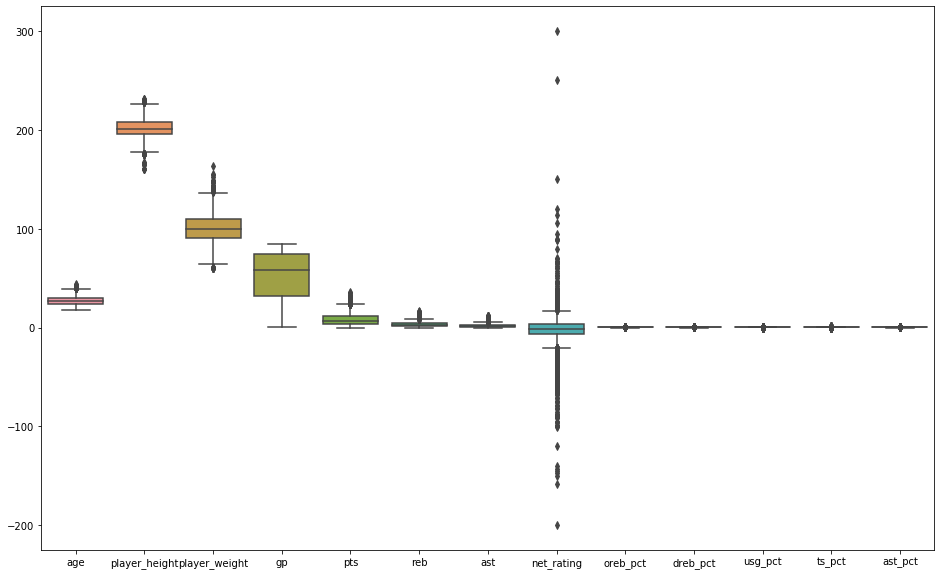

In [8]:
plt.figure(figsize=(16,10))
sns.boxplot(data=nba.drop('potential_player', axis=1))

We can see many outliers in feature net_rating. It because the max net rating recorded in the dataset is 300 while the lowest is -200. This is happens because in one of those single game appearence, that player maybe only played in garbage time thus the net rating deflated. Deal with this, we can use three approaches: drop the record of player who only played few number of games for every season, drop the record of player who only averaged few number of games overall, or simply removed this features from consideration. All of this approaches have their own pros and cons. In the first approach, we can drop some record of a player who actually has a decent career, but has one or two seasons with only one appearances due to injury/rough start.If we choose the first approach, we will neglect his career start, but we can slightly alter his points per game for example, and can create some bias. If we choose the second approach, we will keep this deflated stats and affect our calculation. So,  I want to keep it as it can differentiate good player in good team or bad team

## __Data Visualization__

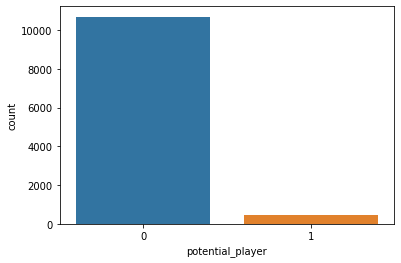

In [9]:
sns.countplot(x='potential_player', data=nba)

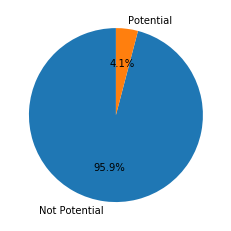

In [10]:
sizes = [len(nba[nba['potential_player']==0]), len(nba[nba['potential_player']==1])]
labels = ['Not Potential', 'Potential']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

Based on these data, it is known that the number of potential players less than players without potential

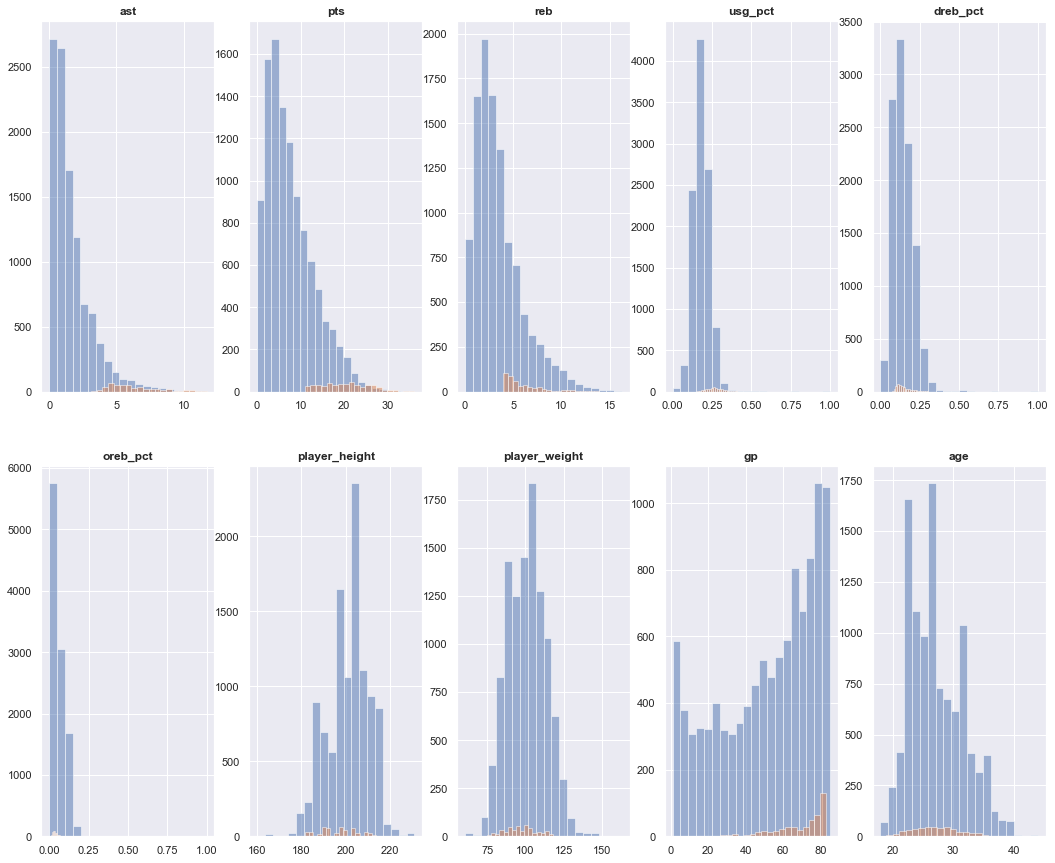

In [104]:
col = ['ast', 'pts', 'reb', 'usg_pct', 'dreb_pct', 'oreb_pct',
       'player_height', 'player_weight', 'gp', 'age']
sns.set(style = "darkgrid")
fig = plt.figure(figsize = (18,15))

for i in range(len(col)):
    a = fig.add_subplot(2, 5, i+1)
    a.set_title(col[i], fontweight="bold")
    nba[col[i]][nba["potential_player"] == 0].hist(bins = 20, alpha = 0.5)
    nba[col[i]][nba["potential_player"] == 1].hist(bins = 20, alpha = 0.5)

In [107]:
pt = nba[nba["potential_player"] == 1]
npt = nba[nba["potential_player"] == 0]


In [111]:
mx = nba["age"].max()
mn = nba["age"].min()
ranges = np.arange(mn, mx + round((mx-mn)/9), round((mx-mn)/9))

age = pd.DataFrame()
age["Potential"] = round(pt["potential_player"].groupby(pd.cut(pt["age"], ranges)).count())
age["Not Potential"] = round(npt["potential_player"].groupby(pd.cut(npt["age"], ranges)).count())
age

,Potential,Not Potential
age,,
"(18.0, 21.0]",19,719
"(21.0, 24.0]",94,2766
"(24.0, 27.0]",130,2719
"(27.0, 30.0]",124,2022
"(30.0, 33.0]",56,1451
"(33.0, 36.0]",26,715
"(36.0, 39.0]",5,255
"(39.0, 42.0]",1,36
"(42.0, 45.0]",0,4


Based on these data, it is known that the number of potential players less than players without potential in terms of age. That players in the 24-27 age range is the highest the potential player category 

In [114]:
mx = nba["player_height"].max()
mn = nba['player_height'].min()
ranges = np.arange(mn, mx + round((mx-mn)/9), round((mx-mn)/9))

height = pd.DataFrame()
height["Potential"] = round(pt["potential_player"].groupby(pd.cut(pt["player_height"], ranges)).count())
height["Not Potential"] = round(npt["potential_player"].groupby(pd.cut(npt["player_height"], ranges)).count())
height

,Potential,Not Potential
player_height,,
"(160.02, 168.02]",0,14
"(168.02, 176.02]",0,24
"(176.02, 184.02]",31,380
"(184.02, 192.02]",104,1587
"(192.02, 200.02]",140,2209
"(200.02, 208.02]",120,3417
"(208.02, 216.02]",60,2897
"(216.02, 224.02]",0,132
"(224.02, 232.02]",0,25


Based on these data, it is known that the number of potential players less than players without potential in terms of height. That players in the 192.2-200.2 cm range is the highest the potential player category 

In [115]:
mx = nba["player_weight"].max()
mn = nba['player_weight'].min()
ranges = np.arange(mn, mx + round((mx-mn)/9), round((mx-mn)/9))

weight = pd.DataFrame()
weight["Potential"] = round(pt["potential_player"].groupby(pd.cut(pt["player_weight"], ranges)).count())
weight["Not Potential"] = round(npt["potential_player"].groupby(pd.cut(npt["player_weight"], ranges)).count())
weight

,Potential,Not Potential
player_weight,,
"(60.328, 71.328]",0,16
"(71.328, 82.328]",39,740
"(82.328, 93.328]",137,2474
"(93.328, 104.328]",181,3426
"(104.328, 115.328]",81,2620
"(115.328, 126.328]",16,1168
"(126.328, 137.328]",1,192
"(137.328, 148.328]",0,36
"(148.328, 159.328]",0,4


Based on these data, it is known that the number of potential players less than players without potential in terms of weight. That players in the  93-104 kg range is the highest the potential player category

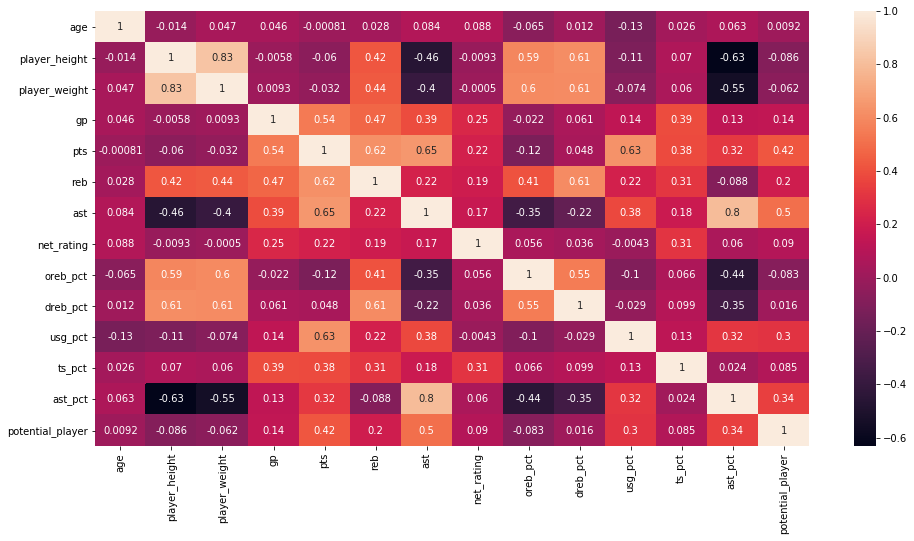

In [11]:
plt.figure(figsize=(16,8))
sns.heatmap(nba.corr(), annot=True)
plt.show()

Based on correlation, feature that has the highest positive correlation is ast (Average number of assists distributed). 
Weight and height of player have negative correlation with potential player.

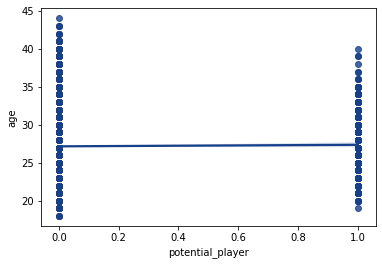

In [12]:
sns.regplot(nba['potential_player'], nba['age'],color='#17408b')


Based on these data, it is known that the number of potential players less than players without potential in terms of age. That players in the 20-40 age range maybe in the potential category but those over the age of 40 are categorized as not potential.

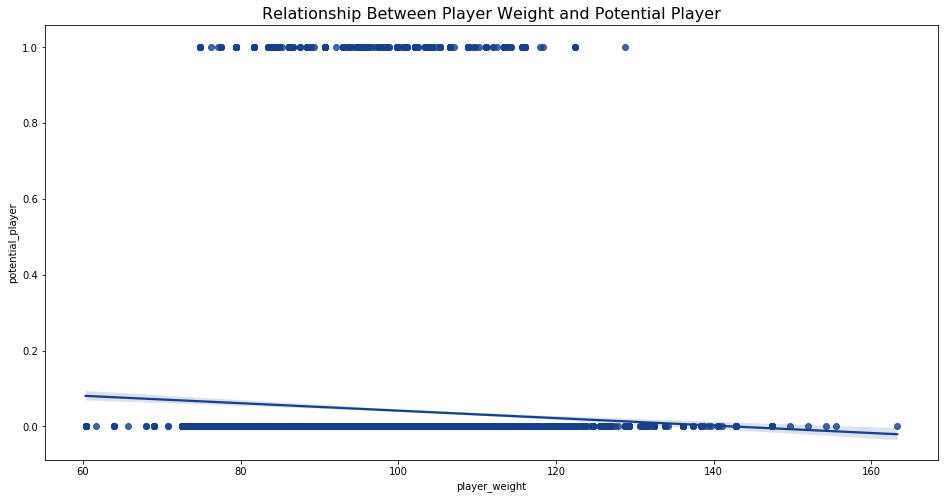

In [13]:
plt.figure(figsize=(16, 8))

sns.regplot(x='player_weight', y='potential_player', data=nba, color='#17408b')

plt.title('Relationship Between Player Weight and Potential Player', fontsize=16)

plt.show()

It is known that the number of potential players less than players without potential in terms of weight, that players weighing between 70-130 kg may still be in the potential category but those over 130 kg are categorized as not potential

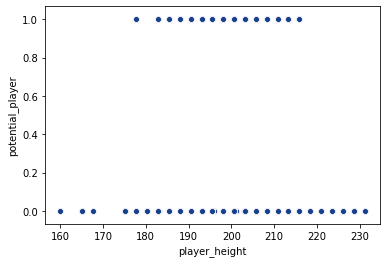

In [14]:
sns.scatterplot(x='player_height', y='potential_player', data=nba, color='#17408b')

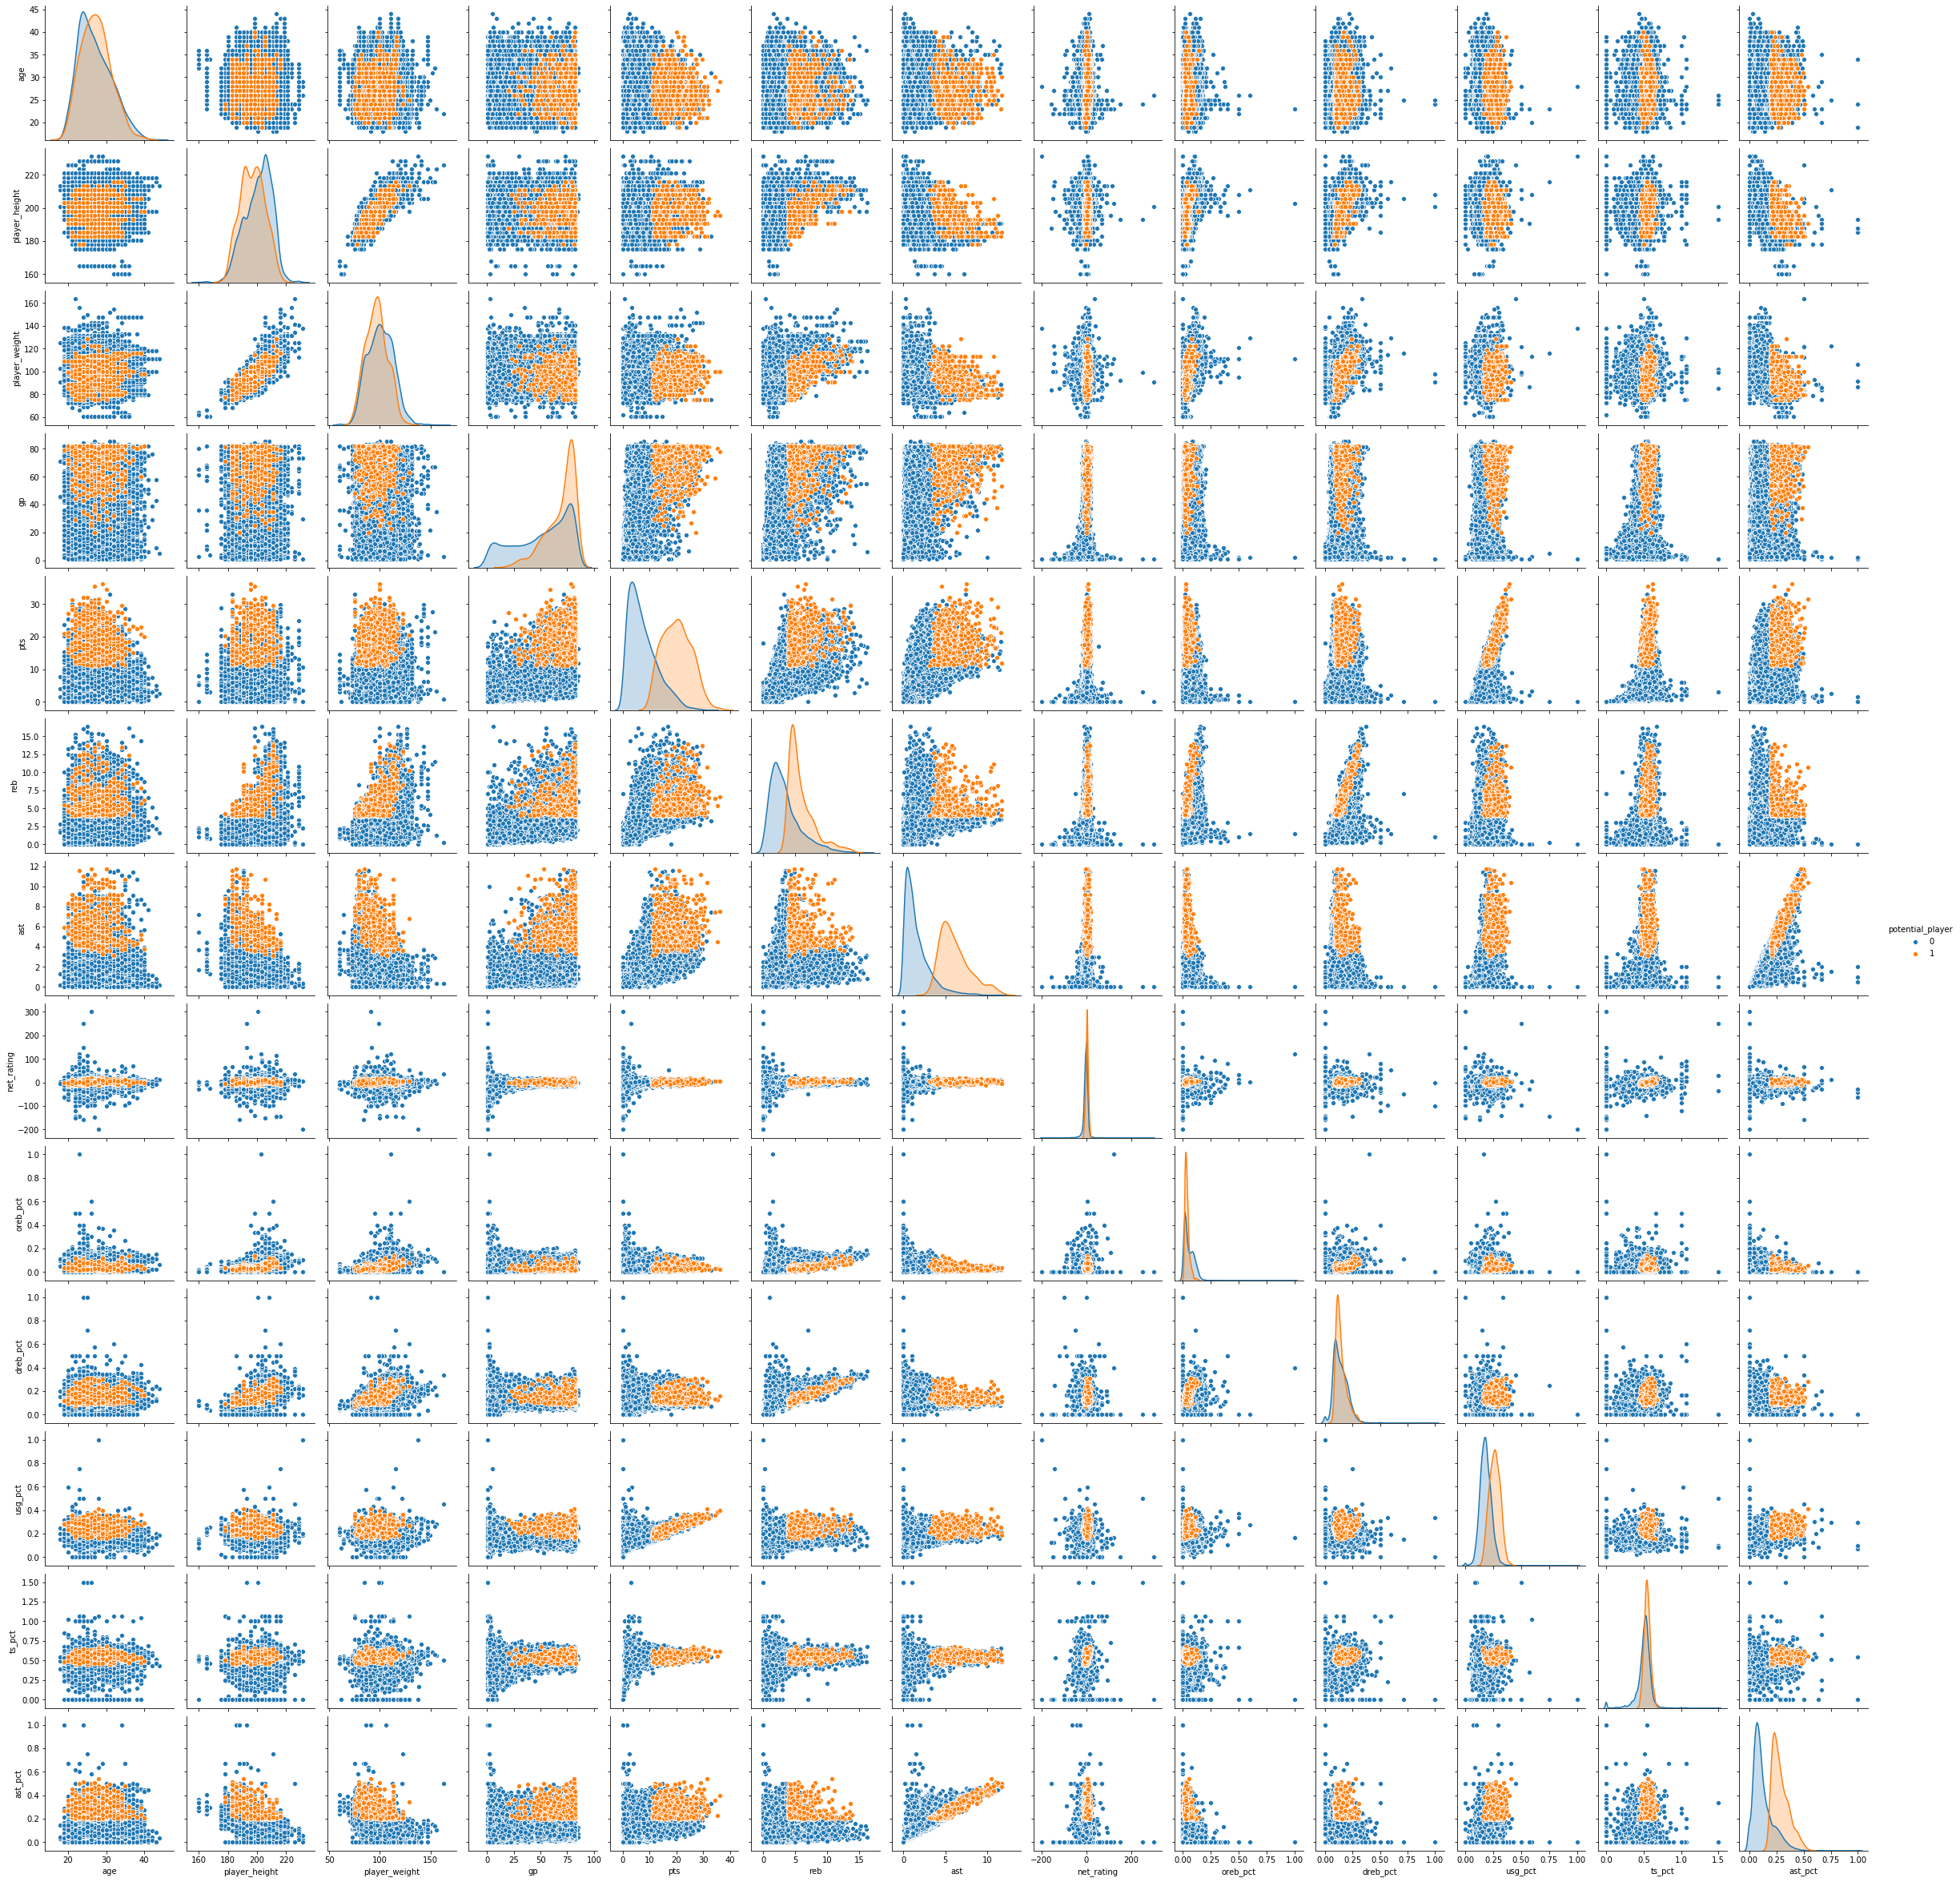

In [101]:
sns.pairplot(nba, hue='potential_player')

## One Hot Encoding

In [15]:
college= pd.get_dummies(nba['college'], drop_first=True, prefix='collage')
country= pd.get_dummies(nba['country'], drop_first=True, prefix='country')

In [73]:
nba_clean = nba.drop(['player_name', 'college', 'country'], axis=1)
nba_clean = pd.concat([nba_clean, college, country], axis=1)
nba_clean

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,...,country_Serbia,country_Serbia and Montenegro,country_Slovenia,country_South Sudan,country_Switzerland,country_Turkey,country_USA,country_Ukraine,country_United Kingdom,country_Venezuela
0,36.0,198.12,99.790240,55,5.7,16.1,3.1,16.1,0.186,0.323,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,28.0,215.90,117.933920,15,2.3,1.5,0.3,12.3,0.078,0.151,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,39.0,205.74,95.254320,9,0.8,1.0,0.4,-2.1,0.105,0.102,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,24.0,203.20,100.697424,64,3.7,2.3,0.6,-8.7,0.060,0.149,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,34.0,205.74,108.862080,27,2.4,2.4,0.2,-11.2,0.109,0.179,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,28.0,208.28,108.862080,63,9.1,5.4,1.1,4.6,0.056,0.140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11141,23.0,195.58,97.522280,15,1.2,0.3,0.1,-2.4,0.018,0.058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11142,28.0,213.36,117.933920,49,6.1,5.1,1.1,5.6,0.029,0.217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11143,27.0,208.28,104.779752,20,2.1,3.0,0.4,-16.4,0.085,0.237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Feature Selection

#### Using Ten Features

In [17]:
nba.corr()['potential_player'].sort_values(ascending=False).to_frame()

,potential_player
potential_player,1.000000
ast,0.503401
pts,0.421311
ast_pct,0.344517
usg_pct,0.303417
reb,0.201826
gp,0.141288
net_rating,0.089950
ts_pct,0.084824
dreb_pct,0.015748


In [18]:
from sklearn.ensemble import ExtraTreesClassifier
x = nba_clean.drop('potential_player', axis=1)
y = nba_clean['potential_player']
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(x,y)
clf.feature_importances_

array([2.74489061e-02, 3.76020108e-02, 3.67313010e-02, 3.15409756e-02,
       1.10090363e-01, 8.93151642e-02, 1.67662994e-01, 3.04075396e-02,
       4.58657280e-02, 4.71814563e-02, 7.13645421e-02, 3.07884539e-02,
       1.08738762e-01, 7.44323899e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.56601291e-06, 0.00000000e+00,
       3.22610728e-03, 2.91065335e-03, 2.18246208e-03, 1.73041401e-05,
       7.11683134e-04, 3.28649967e-09, 1.11909527e-08, 0.00000000e+00,
       0.00000000e+00, 2.74137787e-07, 1.20392484e-04, 0.00000000e+00,
       1.58504799e-04, 7.90665137e-10, 4.01520589e-07, 2.04734680e-05,
       4.24827851e-04, 0.00000000e+00, 3.13060683e-05, 8.80154802e-06,
       1.57586512e-05, 0.00000000e+00, 0.00000000e+00, 7.99085497e-04,
       4.76752350e-04, 0.00000000e+00, 7.36219722e-06, 0.00000000e+00,
       0.00000000e+00, 2.13645461e-08, 2.16655307e-03, 7.16841427e-07,
       2.16579891e-08, 0.00000000e+00, 4.25644365e-05, 5.37632789e-09,
      

In [19]:
extratrees = pd.DataFrame(clf.feature_importances_, index=x.columns, columns=['scores'])
extratrees.sort_values('scores', ascending=False)

,scores
ast,0.167663
pts,0.110090
ast_pct,0.108739
reb,0.089315
usg_pct,0.071365
...,...
collage_Master's,0.000000
collage_University of Texas at Austin,0.000000
collage_University of Nebraska-Lincoln,0.000000
collage_Northwestern State,0.000000


In [20]:
ten_best = extratrees.sort_values('scores', ascending=False).index[0:10]
ten_best

Index(['ast', 'pts', 'ast_pct', 'reb', 'usg_pct', 'dreb_pct', 'oreb_pct',
       'player_height', 'player_weight', 'gp'],
      dtype='object')

In [21]:
nba_model = nba[ten_best]
nba_model['potential_player'] = nba['potential_player']
nba_model

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ast,pts,ast_pct,reb,usg_pct,dreb_pct,oreb_pct,player_height,player_weight,gp,potential_player
0,3.1,5.7,0.113,16.1,0.100,0.323,0.186,198.12,99.790240,55,0
1,0.3,2.3,0.048,1.5,0.175,0.151,0.078,215.90,117.933920,15,0
2,0.4,0.8,0.148,1.0,0.103,0.102,0.105,205.74,95.254320,9,0
3,0.6,3.7,0.077,2.3,0.167,0.149,0.060,203.20,100.697424,64,0
4,0.2,2.4,0.040,2.4,0.127,0.179,0.109,205.74,108.862080,27,0
...,...,...,...,...,...,...,...,...,...,...,...
11140,1.1,9.1,0.064,5.4,0.136,0.140,0.056,208.28,108.862080,63,0
11141,0.1,1.2,0.033,0.3,0.164,0.058,0.018,195.58,97.522280,15,0
11142,1.1,6.1,0.076,5.1,0.120,0.217,0.029,213.36,117.933920,49,0
11143,0.4,2.1,0.056,3.0,0.126,0.237,0.085,208.28,104.779752,20,0


### Train Test Split

In [22]:
x = nba_model.drop('potential_player', axis=1)
y = nba_model['potential_player']
xtr,xts,ytr,yts = train_test_split(x,y, random_state=42)

### Machine Learning

#### Decision Tree Classifier

Using the decision algorithm, we start at the tree root and split the data on the feature that results in the largest information gain (IG) (reduction in uncertainty towards the final decision). In an iterative process, we can then repeat this splitting procedure at each child node until the leaves are pure. This means that the samples at each leaf node all belong to the same class. In practice, we may set a limit on the depth of the tree to prevent overfitting. We compromise on purity here somewhat as the final leaves may still have some impurity.

1. Select the best attribute using Attribute Selection Measures(ASM) to split the records.
2. Make that attribute a decision node and breaks the dataset into smaller subsets.
3. Starts tree building by repeating this process recursively for each child until one of the condition will match:
4. All the tuples belong to the same attribute value.
5. There are no more remaining attributes.
6. There are no more instances.

In [23]:
dtc = DecisionTreeClassifier()
dtc.fit(xtr,ytr)

DecisionTreeClassifier()

In [24]:
dtc_pred = dtc.predict(xts)
dtc_proba = dtc.predict_proba(xts)


In [25]:
print(classification_report(yts,dtc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2672
           1       0.97      0.97      0.97       115

    accuracy                           1.00      2787
   macro avg       0.99      0.98      0.98      2787
weighted avg       1.00      1.00      1.00      2787



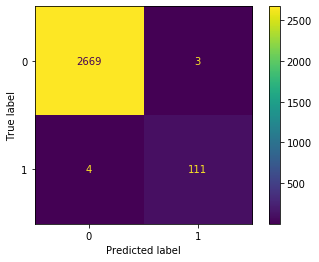

In [26]:
plot_confusion_matrix(dtc, xts, yts)

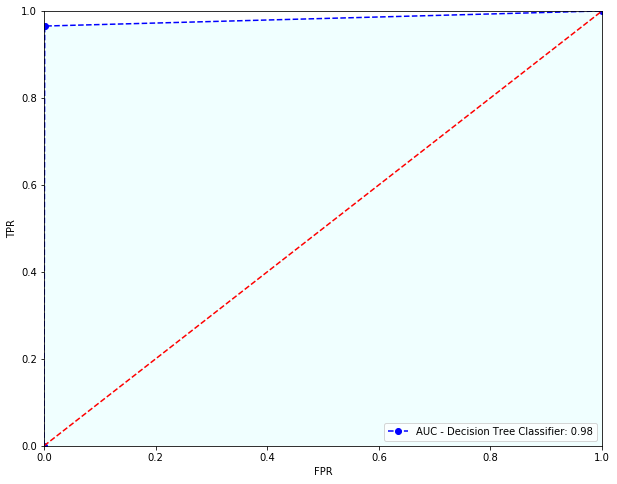

In [29]:
from sklearn.metrics import roc_curve, auc
proba_dtc = dtc.predict_proba(xts)[:,1]
fpr_dtc, tpr_dtc, thr_dtc = roc_curve(yts, proba_dtc)
auc_dtc = auc(fpr_dtc, tpr_dtc)

plt.figure(figsize=(10,8))
plt.plot(fpr_dtc, tpr_dtc, 'b--o', label='AUC - Decision Tree Classifier: {}'.format(round(auc_dtc, 2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.fill_between(fpr_dtc, tpr_dtc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

In [30]:
dtc_thr = pd.DataFrame({'thr': thr_dtc, 'tpr': tpr_dtc, 'fpr': fpr_dtc})
dtc_thr

,thr,tpr,fpr
0,2.0,0.000000,0.000000
1,1.0,0.965217,0.001123
2,0.0,1.000000,1.000000


### Random Forest Classifier

Random Forest algorithm is a supervised classification algorithm. We can see it from its name, which is to create a forest by some way and make it random. There is a direct relationship between the number of trees in the forest and the results it can get: the larger the number of trees, the more accurate the result. But one thing to note is that creating the forest is not the same as constructing the decision with information gain or gain index approach.

The random forest is a model made up of many decision trees. Rather than just simply averaging the prediction of trees (which we could call a “forest”), this model uses two key concepts that gives it the name random:
Random sampling of training data points when building trees
Random subsets of features considered when splitting nodes

1. Randomly select “K” features from total “m” features where k << m
2. Among the “K” features, calculate the node “d” using the best split point
3. Split the node into daughter nodes using the best split
4. Repeat the a to c steps until “l” number of nodes has been reached
5. Build forest by repeating steps a to d for “n” number times to create “n” number of trees



    

In [31]:
rfc = RandomForestClassifier()
rfc.fit(xtr,ytr)

RandomForestClassifier()

In [32]:
rfc_pred = rfc.predict(xts)
rfc_proba = rfc.predict_proba(xts)

In [33]:
print(classification_report(yts,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2672
           1       0.99      0.97      0.98       115

    accuracy                           1.00      2787
   macro avg       1.00      0.99      0.99      2787
weighted avg       1.00      1.00      1.00      2787



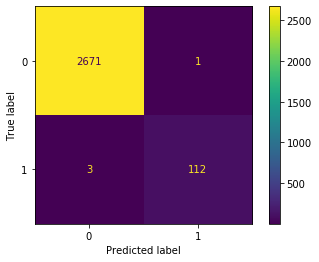

In [34]:
plot_confusion_matrix(rfc, xts, yts)

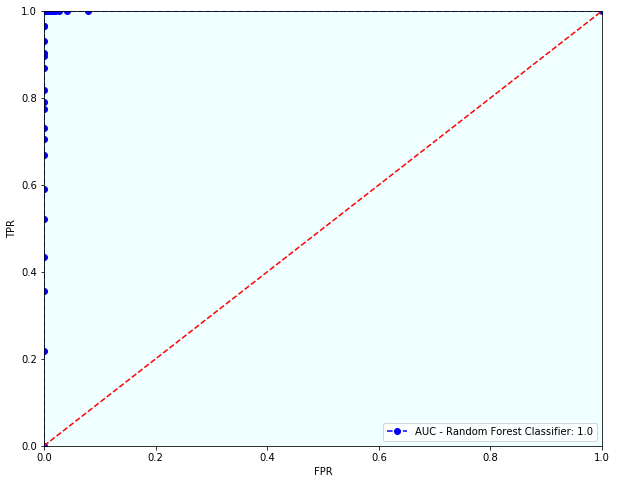

In [36]:
from sklearn.metrics import roc_curve, auc
proba_rfc = rfc_proba[:,1]
fpr_rfc, tpr_rfc, thr_rfc = roc_curve(yts, proba_rfc)
auc_rfc = auc(fpr_rfc, tpr_rfc)

plt.figure(figsize=(10,8))
plt.plot(fpr_rfc, tpr_rfc, 'b--o', label='AUC - Random Forest Classifier: {}'.format(round(auc_rfc, 2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.fill_between(fpr_rfc, tpr_rfc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

In [37]:
rfc_thr = pd.DataFrame({'thr': thr_rfc, 'tpr': tpr_rfc, 'fpr': fpr_rfc})
rfc_thr

,thr,tpr,fpr
0,2.00,0.000000,0.000000
1,1.00,0.217391,0.000000
2,0.99,0.356522,0.000000
3,0.98,0.434783,0.000000
4,0.97,0.521739,0.000000
5,0.96,0.591304,0.000000
6,0.95,0.669565,0.000000
7,0.94,0.704348,0.000000
8,0.93,0.730435,0.000000
9,0.92,0.773913,0.000000


### Gradient Boost Classifier

In [38]:
gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_leaf_nodes=20, subsample=0.5)
gbc.fit(xtr, ytr)

GradientBoostingClassifier(max_leaf_nodes=20, subsample=0.5)

In [39]:
gbc_pred = gbc.predict(xts)
gbc_proba = gbc.predict_proba(xts)

In [40]:
print(classification_report(yts,gbc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2672
           1       0.99      0.99      0.99       115

    accuracy                           1.00      2787
   macro avg       1.00      1.00      1.00      2787
weighted avg       1.00      1.00      1.00      2787



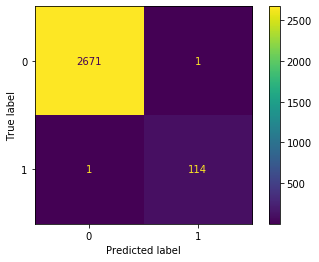

In [41]:
plot_confusion_matrix(gbc, xts, yts)

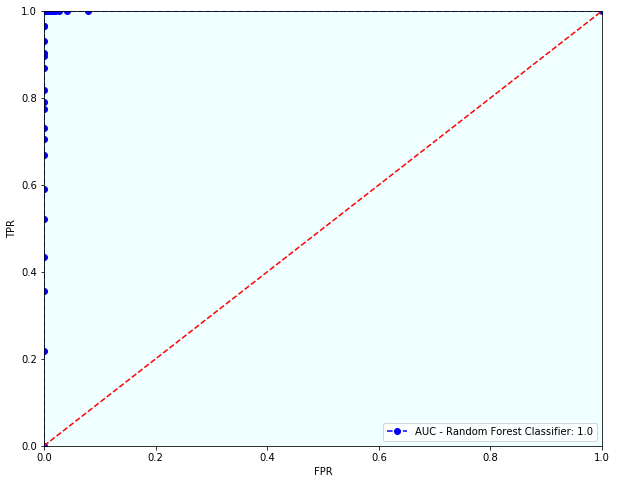

In [43]:
from sklearn.metrics import roc_curve, auc
proba_gbc = rfc_proba[:,1]
fpr_gbc, tpr_gbc, thr_gbc = roc_curve(yts, proba_gbc)
auc_gbc = auc(fpr_gbc, tpr_gbc)

plt.figure(figsize=(10,8))
plt.plot(fpr_gbc, tpr_gbc, 'b--o', label='AUC - Random Forest Classifier: {}'.format(round(auc_gbc, 2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.fill_between(fpr_gbc, tpr_gbc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

In [44]:
rfc_thr = pd.DataFrame({'thr': thr_rfc, 'tpr': tpr_rfc, 'fpr': fpr_rfc})
rfc_thr

,thr,tpr,fpr
0,2.00,0.000000,0.000000
1,1.00,0.217391,0.000000
2,0.99,0.356522,0.000000
3,0.98,0.434783,0.000000
4,0.97,0.521739,0.000000
5,0.96,0.591304,0.000000
6,0.95,0.669565,0.000000
7,0.94,0.704348,0.000000
8,0.93,0.730435,0.000000
9,0.92,0.773913,0.000000


5.1 Jika Machine Learning Anda menyatakan seorang pemain tidak berpotensi maka tim Anda akan langsung mencoret nama pemain tersebut.
5.2 Sebaliknya jika lolos pada seleksi Machine Learning Anda, para pemain tadi akan direkrut dan mengikuti pelatihan ke tahap selanjutnya.

- Mengurangi probabilitas model melakukan False Negative (Sebenarnya pemain berpotensi, namun terprediksi tidak berpotensi) 
- Mengurangi probabilitas model melakukan False Positive (Sebenarnya pemain tidak berpotensi, namun terprediksi berpotensi)

About the three machine learning models above, each metric evaluation model already has a fairly good value, this can be seen from the accuracy value of the model which is 1.00. However, to determine the best model, we also need to consider the value of precision, recall, and f1_score. The machine learning model Gradient Boost Classifier is a model that has the highest precision, recall and f1_score values, namely 0.99, so that this model is the best model for making predictions on the testing dataset. 

Based on statement in this case, what is done is to reduce the probability of the model doing False Negatives, which is a potential player, but it is predicted that there is no potential). this is because if a player has potential but is predicted not to have potential, he will immediately be dropped from the team. This situation will certainly be detrimental to the team because the players who have been crossed out are potential players. Conversely, if the player has no potential but is predicted to have potential, of course, they will remain in the team and can carry out training. With this training, what was initially not potential could become potential player.

### Reduce False Negative

#### __SMOTE__

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
sm = SMOTE()
xsmo, ysmo = sm.fit_resample(xtr, ytr)

In [47]:
ysmo.value_counts(normalize=True)

1    0.5
0    0.5
Name: potential_player, dtype: float64

In [48]:
dtc_smo = DecisionTreeClassifier()
dtc_smo.fit(xsmo, ysmo)
smodtc_pred = dtc_smo.predict(xts)
smodtc_proba = dtc_smo.predict_proba(xts)

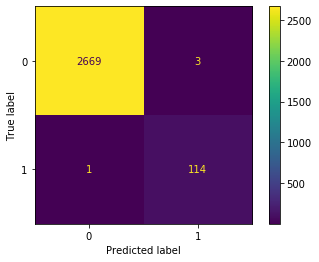

In [49]:
plot_confusion_matrix(dtc_smo, xts, yts)

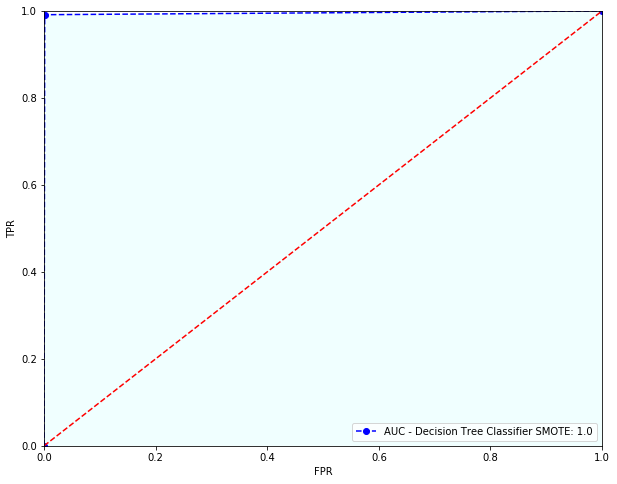

In [58]:
proba_dtc_smo = smodtc_proba[:,1]
fpr_dtc_smo, tpr_dtc_smo, thr_dtc_smo = roc_curve(yts, proba_dtc_smo)
auc_dtc_smo = auc(fpr_dtc_smo, tpr_dtc_smo)

plt.figure(figsize=(10,8))
plt.plot(fpr_dtc_smo, tpr_dtc_smo, 'b--o', label='AUC - Decision Tree Classifier SMOTE: {}'.format(round(auc_dtc_smo, 2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.fill_between(fpr_dtc_smo, tpr_dtc_smo, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

In [59]:
dtc_thr_smo = pd.DataFrame({'thr': thr_dtc_smo, 'tpr': tpr_dtc_smo, 'fpr': fpr_dtc_smo})
dtc_thr_smo

,thr,tpr,fpr
0,2.0,0.000000,0.000000
1,1.0,0.991304,0.001123
2,0.0,1.000000,1.000000


In [60]:
rfc_smo = RandomForestClassifier()
rfc_smo.fit(xsmo, ysmo)
smorfc_pred = rfc_smo.predict(xts)
smorfc_proba = rfc_smo.predict_proba(xts)

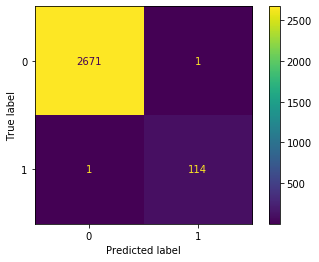

In [61]:
plot_confusion_matrix(rfc_smo, xts, yts)

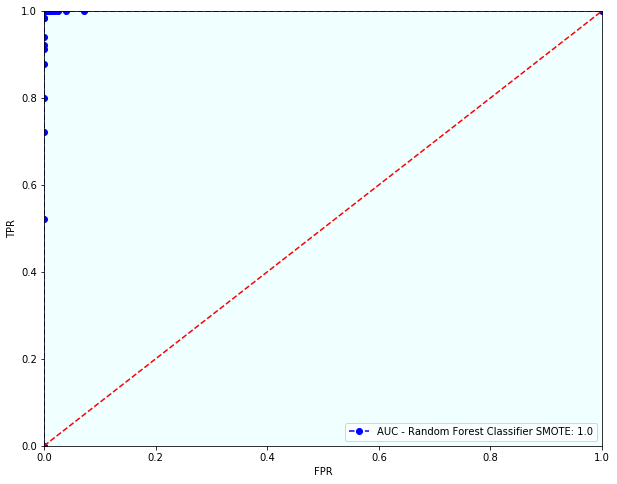

In [62]:
proba_rfc_smo = smorfc_proba[:,1]
fpr_rfc_smo, tpr_rfc_smo, thr_rfc_smo = roc_curve(yts, proba_rfc_smo)
auc_rfc_smo = auc(fpr_rfc_smo, tpr_rfc_smo)

plt.figure(figsize=(10,8))
plt.plot(fpr_rfc_smo, tpr_rfc_smo, 'b--o', label='AUC - Random Forest Classifier SMOTE: {}'.format(round(auc_rfc_smo, 2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.fill_between(fpr_rfc_smo, tpr_rfc_smo, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

In [63]:
rfc_thr_smo = pd.DataFrame({'thr': thr_rfc_smo, 'tpr': tpr_rfc_smo, 'fpr': fpr_rfc_smo})
rfc_thr_smo

,thr,tpr,fpr
0,2.00,0.000000,0.000000
1,1.00,0.521739,0.000000
2,0.99,0.721739,0.000000
3,0.98,0.800000,0.000000
4,0.95,0.878261,0.000000
5,0.94,0.913043,0.000000
6,0.93,0.921739,0.000000
7,0.92,0.939130,0.000000
8,0.80,0.982609,0.000000
9,0.77,0.982609,0.000374


In [64]:
gbc_smo = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_leaf_nodes=20, subsample=0.5)
gbc_smo.fit(xsmo, ysmo)
smogbc_pred = gbc_smo.predict(xts)
smogbc_proba = gbc_smo.predict_proba(xts)

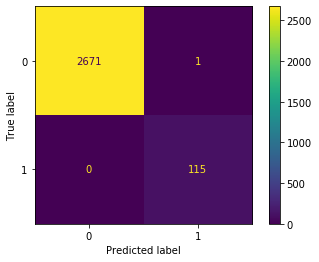

In [65]:
plot_confusion_matrix(gbc_smo, xts, yts)

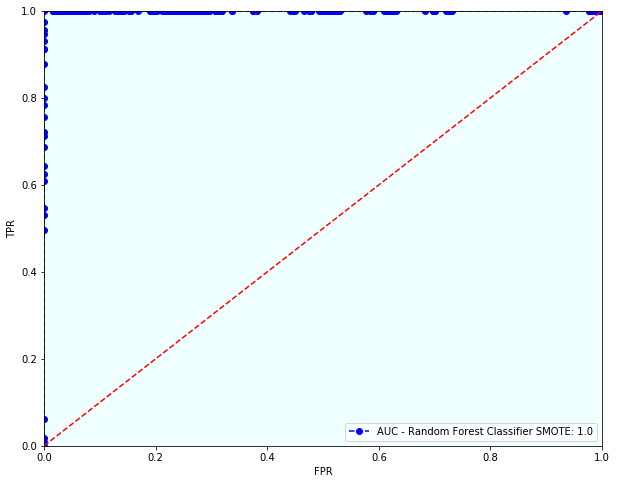

In [67]:
proba_gbc_smo = smogbc_proba[:,1]
fpr_gbc_smo, tpr_gbc_smo, thr_gbc_smo = roc_curve(yts, proba_gbc_smo)
auc_gbc_smo = auc(fpr_gbc_smo, tpr_gbc_smo)

plt.figure(figsize=(10,8))
plt.plot(fpr_gbc_smo, tpr_gbc_smo, 'b--o', label='AUC - Random Forest Classifier SMOTE: {}'.format(round(auc_gbc_smo, 2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.fill_between(fpr_gbc_smo, tpr_gbc_smo, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

In [68]:
gbc_thr_smo = pd.DataFrame({'thr': thr_gbc_smo, 'tpr': tpr_gbc_smo, 'fpr': fpr_gbc_smo})
gbc_thr_smo

,thr,tpr,fpr
0,1.999833,0.000000,0.000000
1,0.999833,0.008696,0.000000
2,0.999816,0.017391,0.000000
3,0.999802,0.060870,0.000000
4,0.999793,0.495652,0.000000
...,...,...,...
270,0.000024,1.000000,0.991392
271,0.000023,1.000000,0.995135
272,0.000023,1.000000,0.995883
273,0.000023,1.000000,0.997380


### New Player Predict

In [69]:
new = pd.read_csv('new_players.csv')
new

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250
3,3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174
4,4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,28.0,200.66,103.418976,Nevada-Las Vegas,USA,81,21.8,11.8,1.8,7.1,0.086,0.238,0.222,0.591,0.068
496,496,497,28.0,200.66,107.047712,California,USA,78,12.8,4.4,1.6,-4.9,0.054,0.124,0.233,0.490,0.099
497,497,498,23.0,208.28,103.418976,Wisconsin,USA,46,4.7,2.6,0.5,0.2,0.087,0.162,0.174,0.536,0.072
498,498,499,24.0,213.36,108.862080,DePaul,USA,69,6.1,3.9,0.2,-1.7,0.099,0.140,0.146,0.598,0.021


In [70]:
new.drop(['Unnamed: 0'], axis=1, inplace=True) 

In [95]:
prob = gbc_smo.predict_proba(new[['ast', 'pts', 'ast_pct', 'reb', 'usg_pct', 'dreb_pct', 'oreb_pct',
       'player_height', 'player_weight', 'gp']])
prob1 = prob[:,1]
new_pred = [0 if x < 0.000023 else 1 for x in prob1][0]

In [99]:
new['new_pred']= new_pred
new[new['new_pred']==1]

,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,new_pred
0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069,1
1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344,1
2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250,1
3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174,1
4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,28.0,200.66,103.418976,Nevada-Las Vegas,USA,81,21.8,11.8,1.8,7.1,0.086,0.238,0.222,0.591,0.068,1
496,497,28.0,200.66,107.047712,California,USA,78,12.8,4.4,1.6,-4.9,0.054,0.124,0.233,0.490,0.099,1
497,498,23.0,208.28,103.418976,Wisconsin,USA,46,4.7,2.6,0.5,0.2,0.087,0.162,0.174,0.536,0.072,1
498,499,24.0,213.36,108.862080,DePaul,USA,69,6.1,3.9,0.2,-1.7,0.099,0.140,0.146,0.598,0.021,1


By using the best machine learning models it can be concluded that all players in the new_player data are predicted as potential players